# Import necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load and explore the data

In [17]:
from keras.datasets import boston_housing

(trainX, trainY), (testX, testY) = boston_housing.load_data()

In [18]:
# take a look at the data

print(f'Training data : {trainX.shape}')
print(f'Test data : {testX.shape}')

Training data : (404, 13)
Test data : (102, 13)


In [19]:
print(f'Training sample : {trainX[0]}')

Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [20]:
print(f'Training target sample : {trainY[0]}')

Training target sample : 15.2


# Prepare training and testing data

In [21]:
mean = trainX.mean(axis=0)
trainX -= mean
std = trainX.std(axis=0)
trainX /= std

testX -= mean
testX /= std

# Create a model

In [22]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
          loss='mse',
          metrics=['mae'])


# Compile the model

In [23]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [24]:
# Fit the model
H = model.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(testX, testY))

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 0s 761us/step - loss: 513.0218 - val_loss: 433.7569
Epoch 2/10
404/404 [==============================] - 0s 107us/step - loss: 271.9272 - val_loss: 125.0772
Epoch 3/10
404/404 [==============================] - 0s 118us/step - loss: 71.4154 - val_loss: 50.3257
Epoch 4/10
404/404 [==============================] - 0s 101us/step - loss: 36.0337 - val_loss: 34.2536
Epoch 5/10
404/404 [==============================] - 0s 96us/step - loss: 25.5537 - val_loss: 28.9353
Epoch 6/10
404/404 [==============================] - 0s 104us/step - loss: 21.1482 - val_loss: 26.0627
Epoch 7/10
404/404 [==============================] - 0s 95us/step - loss: 18.5636 - val_loss: 25.2753
Epoch 8/10
404/404 [==============================] - 0s 94us/step - loss: 16.6651 - val_loss: 24.2419
Epoch 9/10
404/404 [==============================] - 0s 93us/step - loss: 15.3271 - val_loss: 23.8149
Epoch 10/10
404/40

# Evaluate the results

In [25]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print(scores)

# # evaluate the model : test
scores = model.evaluate(testX, testY)
print(scores)

404/404 [==============================] - 0s 15us/step
13.697865996030298
102/102 [==============================] - 0s 21us/step
24.839773140701592


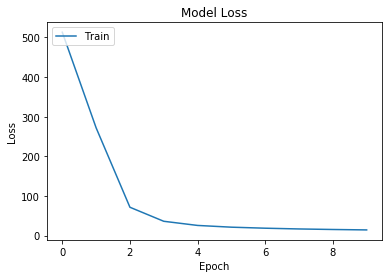

In [26]:
# Plot training & validation accuracy values
plt.plot(H.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [33]:
predictions = model.predict(trainX)
# round prediction
# rounded = [round(x[0]) for x in predictions]
print(predictions[0])

[14.359659]
